In [1]:
import numpy as np
from pathlib import Path
import pandas as pd
from sys import platform
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import medfilt
sns.set_style('ticks')
%matplotlib inline

In [2]:
vol_file = Path('../Voltron_data/Voltron_Log_DRN_Exp.csv')
dat_xls_file = pd.read_csv(vol_file, index_col=0)
dat_xls_file['folder'] = dat_xls_file['folder'].apply(lambda x: f'{x:0>8}')
# using Path to handle switches filesystems
if platform == "linux" or platform == "linux2":
    dir_folder = Path('/nrs/ahrens/Ziqiang/Takashi_DRN_project/ProcessedData/')
elif platform == 'win32':
    dir_folder = Path('U:\\Takashi') # put folder for windows system
include_inds = np.array([4, 5, 11, 12, 13, 14, 22, 31, 32, 33, 34, 38, 39, 43, 52, 54])
sigma=20;
short_kernel=(1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(np.arange(-60,61)**2)/(2*sigma**2))

In [23]:
def plot_swim(row):
    folder = row['folder']
    fish = row['fish']
    task_type = row['task'][0]
    dat_dir = dir_folder/f'{folder}/{fish}/Data/'
    swim_dir = dir_folder/f'{folder}/{fish}/swim/'
    if not os.path.exists(swim_dir/'frame_stimParams.npy'):
        return None
    frame_stimParams = np.load(swim_dir/'frame_stimParams.npy')
    frame_swim_tcourse = np.load(swim_dir/'frame_swim_tcourse.npy')
    swim_starts = np.where(np.diff((frame_swim_tcourse[0,:]>0).astype('int'))==1)[0]
    swim_ends   = np.where(np.diff((frame_swim_tcourse[0,:]>0).astype('int'))==-1)[0]
    swim_ends   = swim_ends[((swim_starts>50) & (swim_starts<(frame_swim_tcourse.shape[1]-250)))]
    swim_starts = swim_starts[((swim_starts>50) & (swim_starts<(frame_swim_tcourse.shape[1]-250)))]
    task_period = frame_stimParams[2,swim_starts]
    task_index   = frame_stimParams[2,:]+(frame_stimParams[3,:]-1)*4+(frame_stimParams[4,:]-1)*12;
    swim_task_index =  task_index[swim_starts]
    swim_count  = np.zeros((len(swim_starts),))
    if task_type == 'S':
        task_period[:] = 1
    
    if len(swim_starts)==0:
        return None
    if (task_period==1).sum()==0:
        return None
    if (task_period==2).sum()==0 and not task_type=='S':
        return None
    
    ind_old=0
    for s in range(len(swim_starts)):
        ind=swim_task_index[s]
        if (ind>ind_old):
            swim_count[s]=1
            ind_old=ind
        elif (ind==ind_old):
            swim_count[s]=swim_count[s-1]+1

    ## mean swim ptterns

    ave_swim=np.zeros((len(swim_starts),300))
    ave_visu=np.zeros((len(swim_starts),300))
    ave_swim_len = np.zeros(len(swim_starts))

    for i in range(len(swim_starts)):
        swim_len = swim_ends[i] - swim_starts[i]
        if swim_len>250:
            swim_len = 250
        ave_swim_len[i] = swim_len
        ave_swim[i,:swim_len+50]=frame_swim_tcourse[2,(swim_starts[i]-50):(swim_starts[i]+swim_len)]*100000
        ave_visu[i,:swim_len+50]=-frame_stimParams[0,(swim_starts[i]-50):(swim_starts[i]+swim_len)]*10000
    
    fig, ax = plt.subplots(1, 4, figsize=(16, 4))
    ax[0].plot(np.arange(-50,250)/300,ave_swim[task_period==1,:].T, '-k')
    if (task_period==2).sum()>0:
        ax[0].plot(np.arange(-50,250)/300,ave_swim[task_period==2,:].T, '-r')
    ax[0].set_title('Swim power')
    ax[1].plot(np.arange(-50,250)/300,ave_visu[task_period==1,:].T, '-k')
    if (task_period==2).sum()>0:
        ax[1].plot(np.arange(-50,250)/300,ave_visu[task_period==2,:].T, '-r') 
    ax[1].set_title('Visual velocity')
    tot_swim_power = ave_swim[:,50:].sum(axis=1)
    ax[2].plot(ave_swim_len, tot_swim_power, 'o')
    ax[2].set_ylabel('Total swim power')
    ax[2].set_xlabel('Swim length')
    ax[2].set_title(row['task'])
    ax[3].imshow(ave_swim[:,50:200], vmax=60)
    plt.savefig(f'swim_power/{folder}_{fish}.png')
#     plt.close()

/groups/ahrens/home/weiz/anaconda/envs/myenv/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


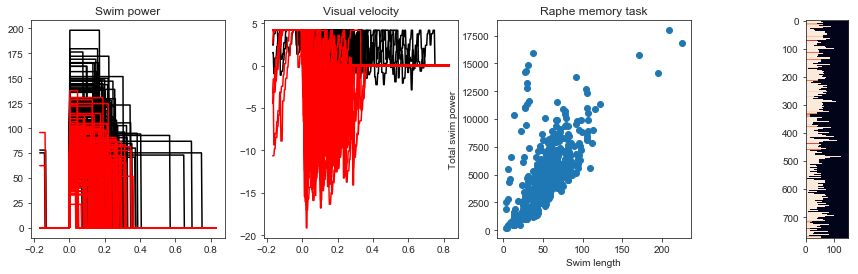

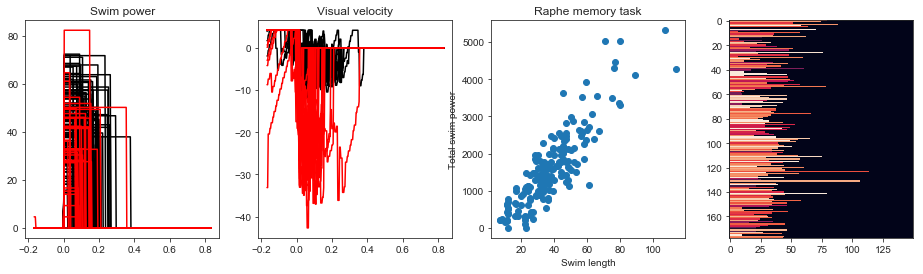

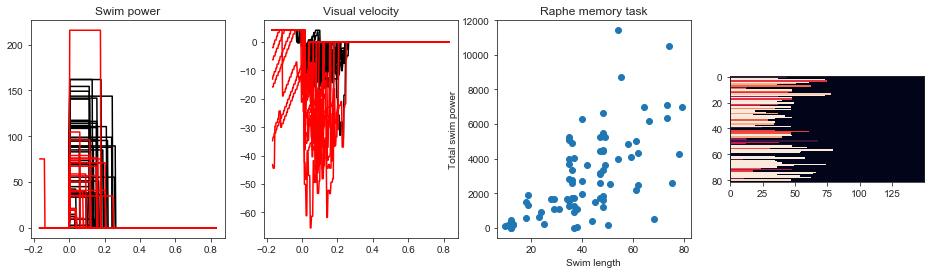

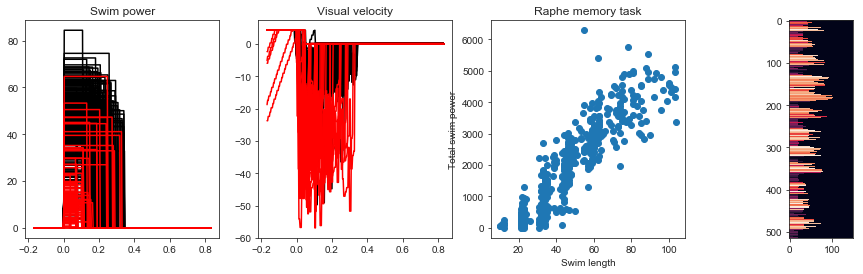

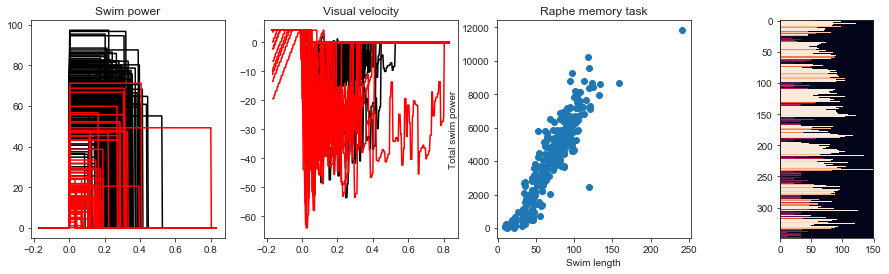

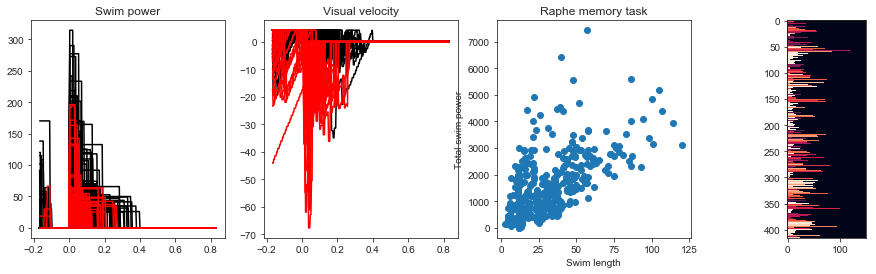

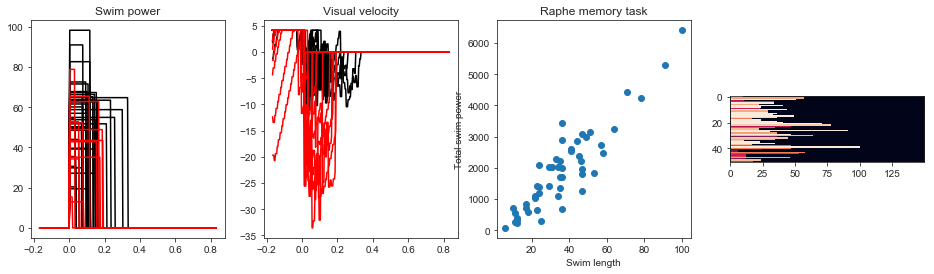

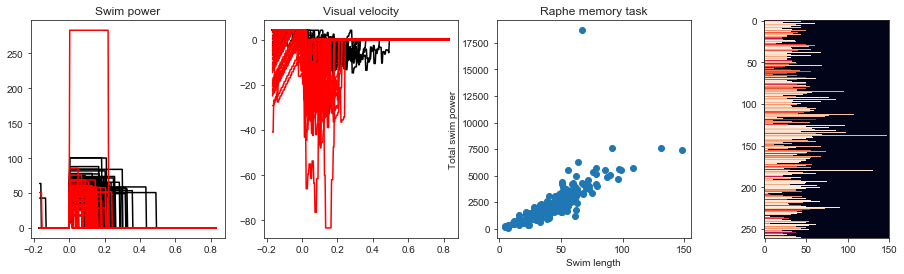

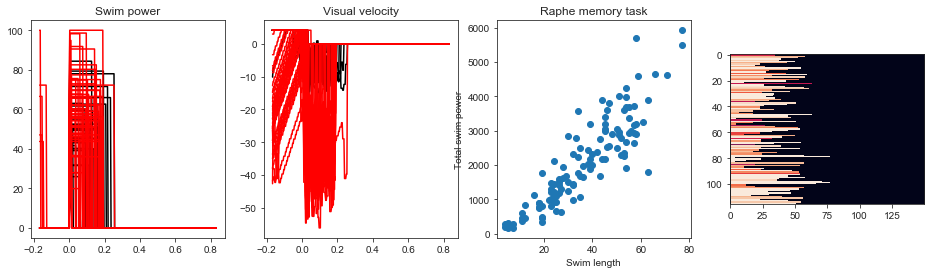

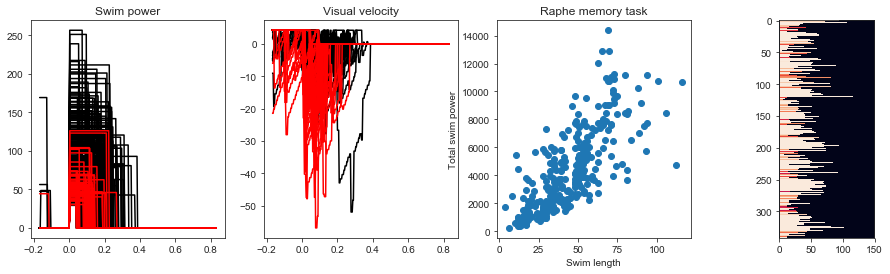

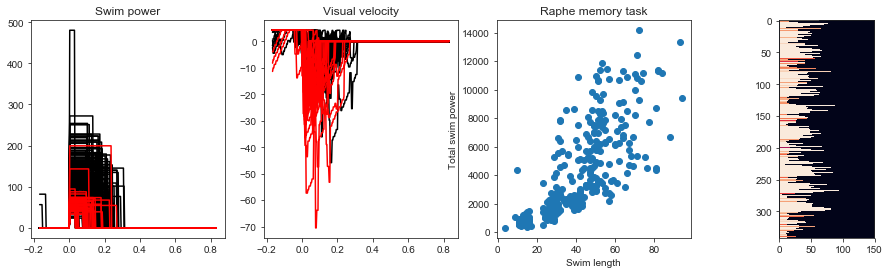

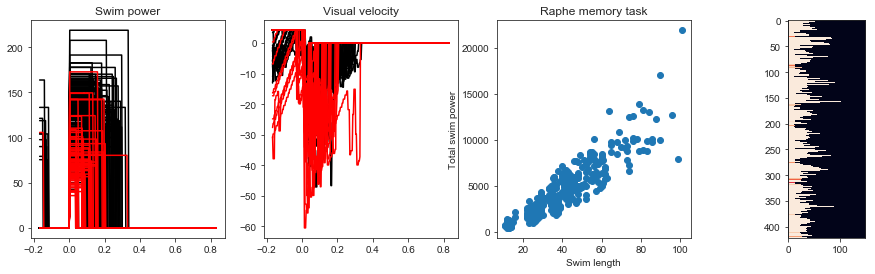

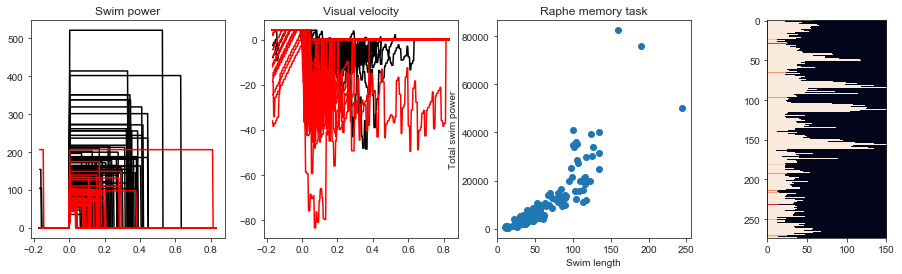

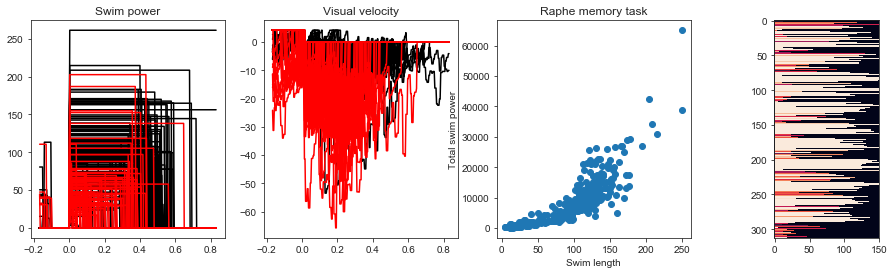

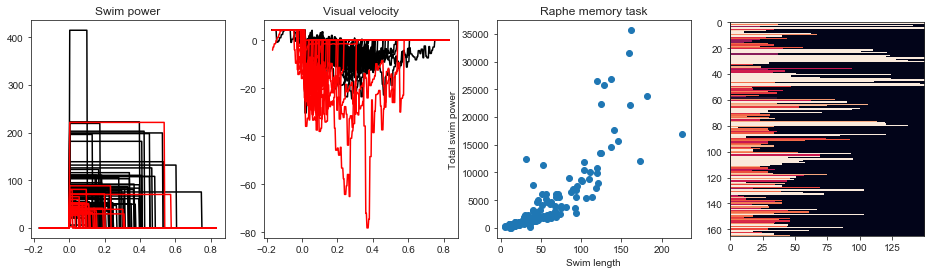

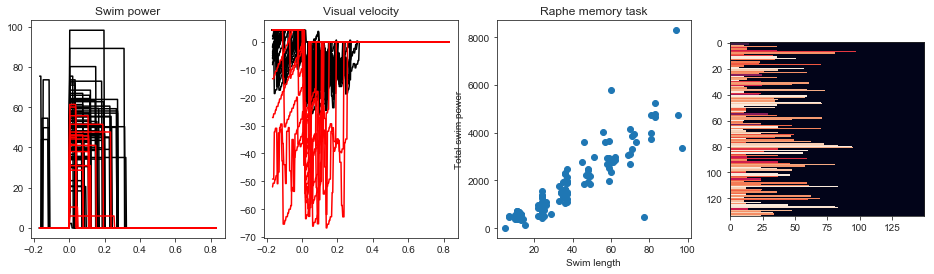

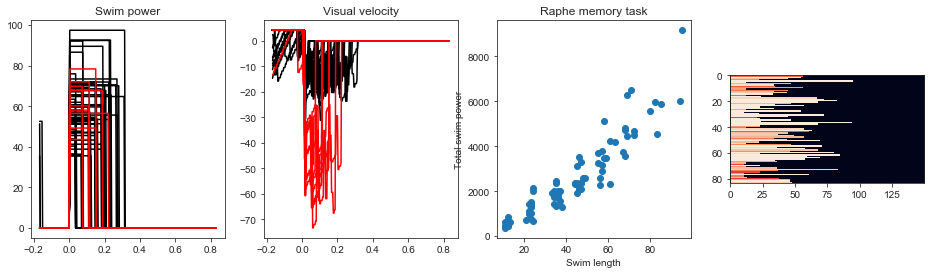

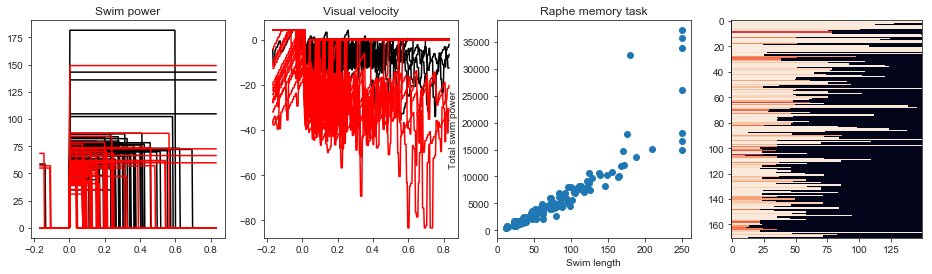

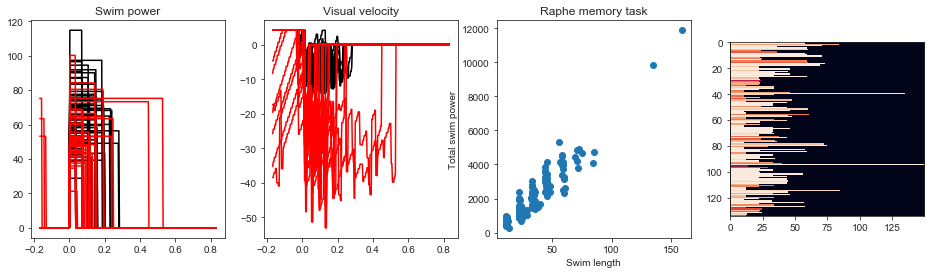

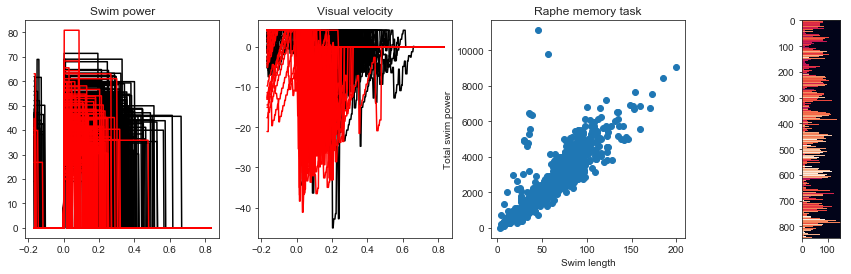

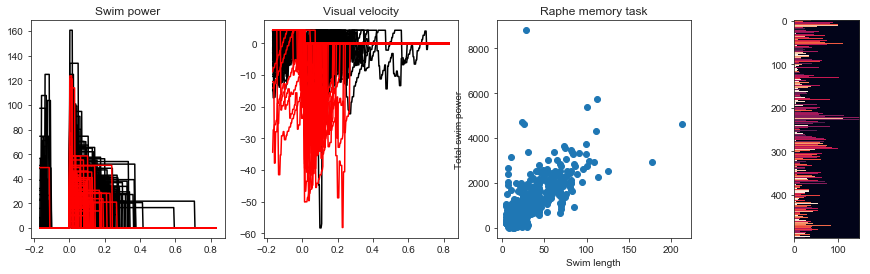

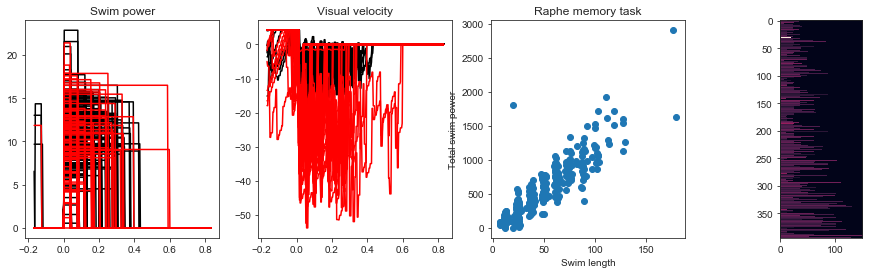

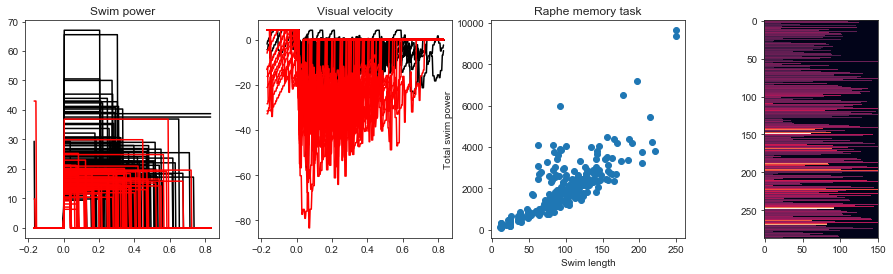

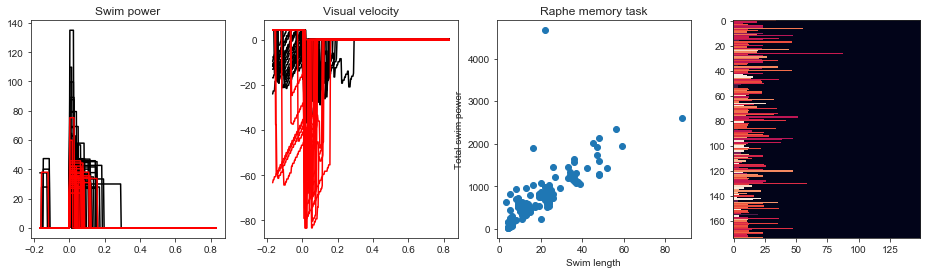

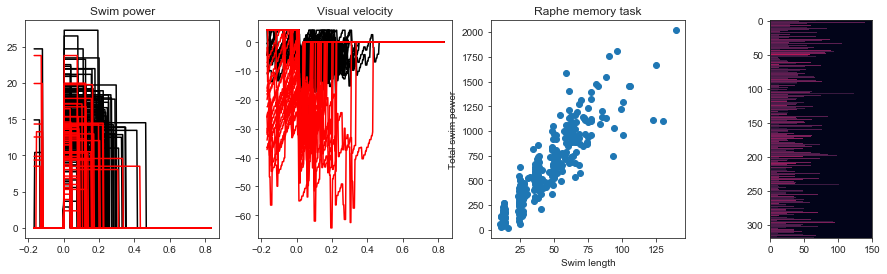

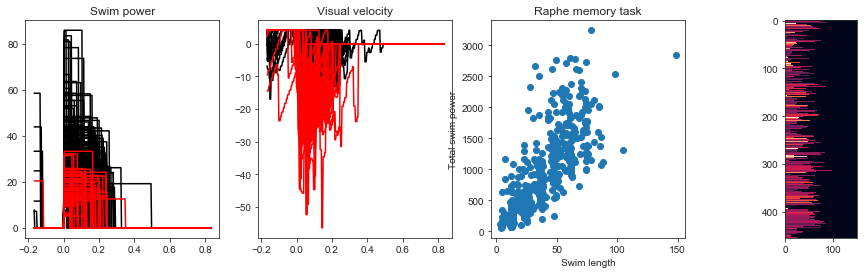

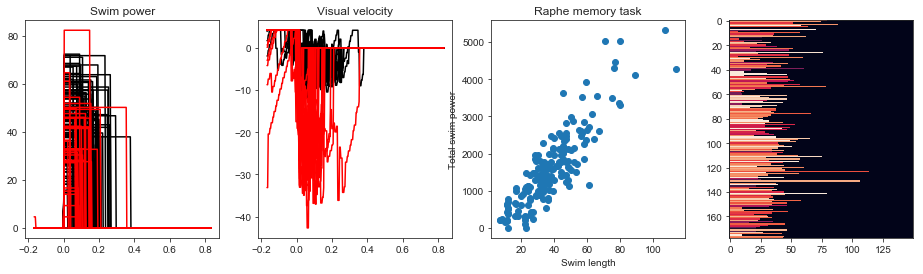

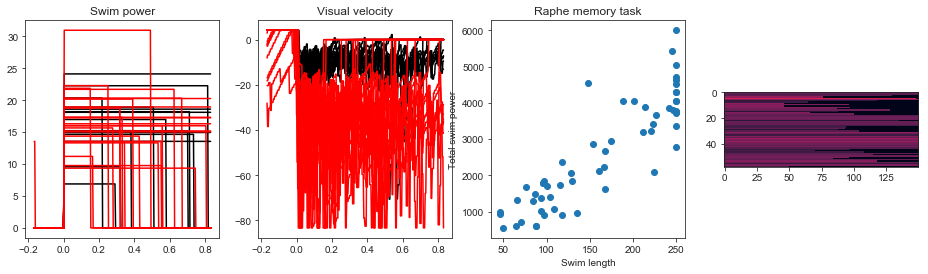

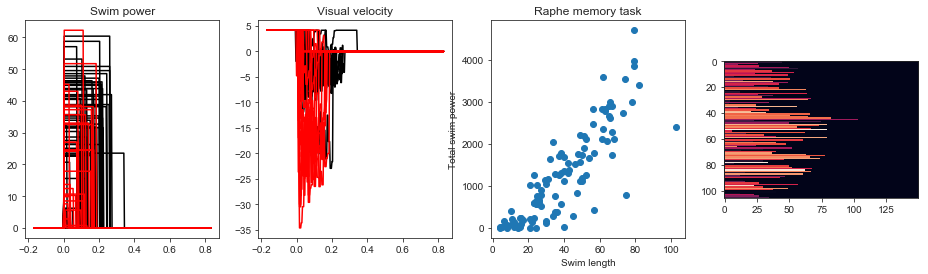

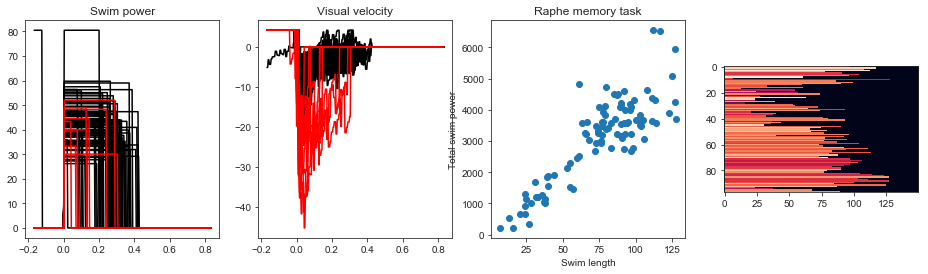

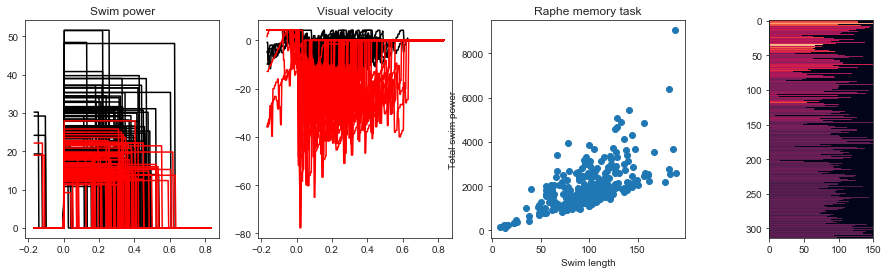

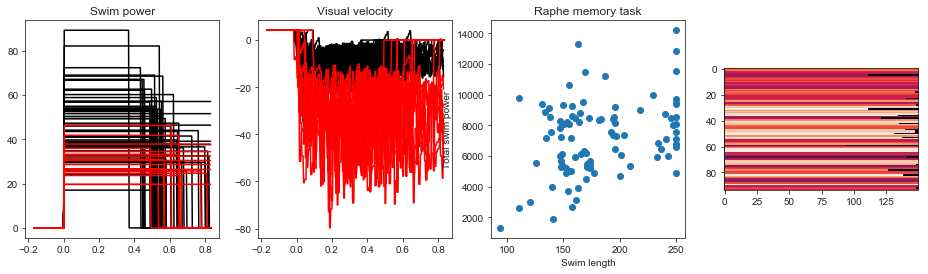

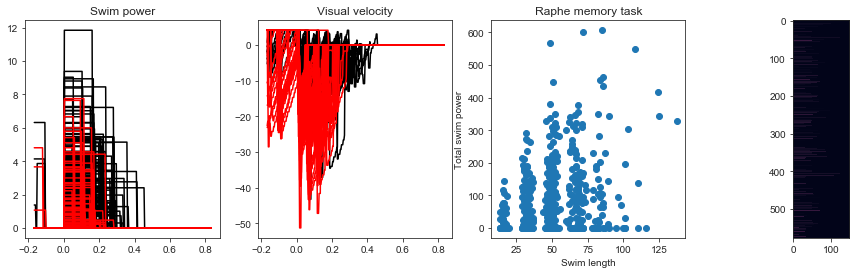

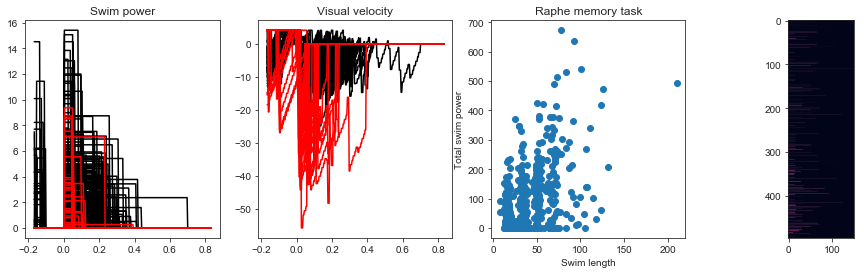

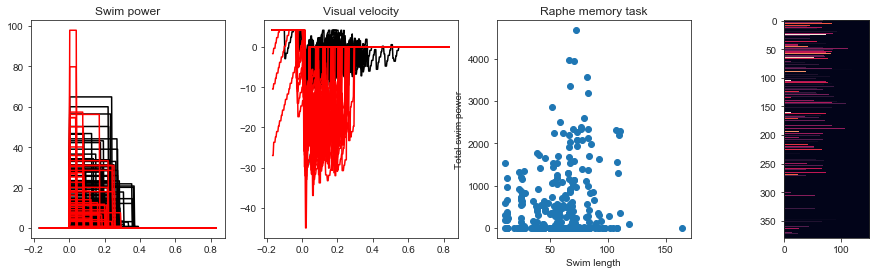

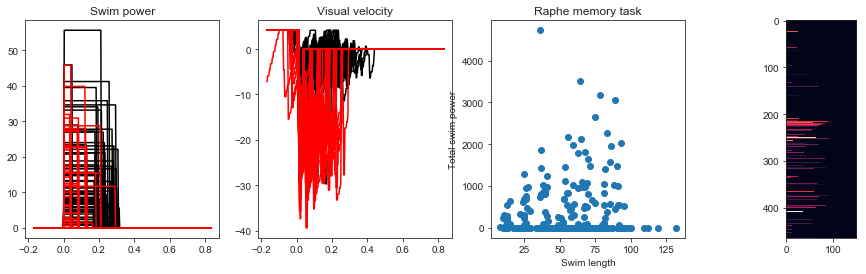

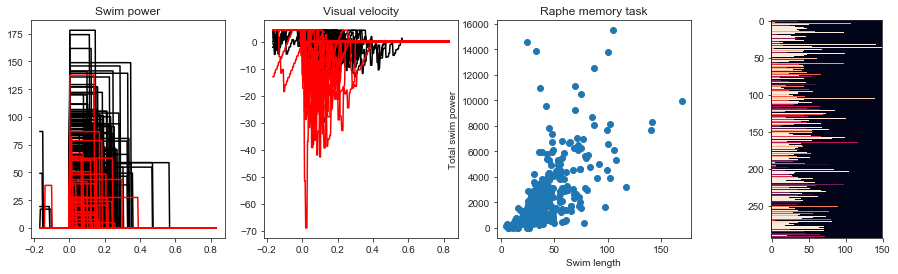

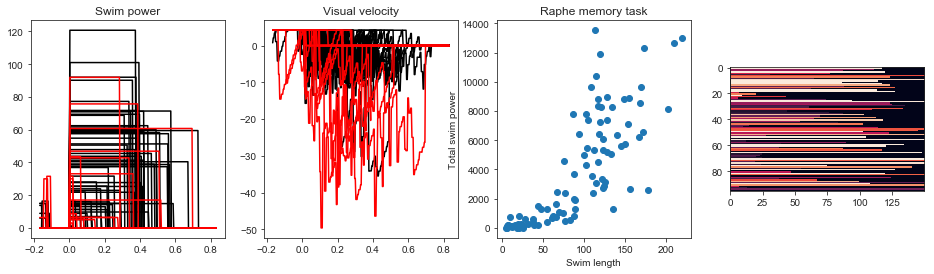

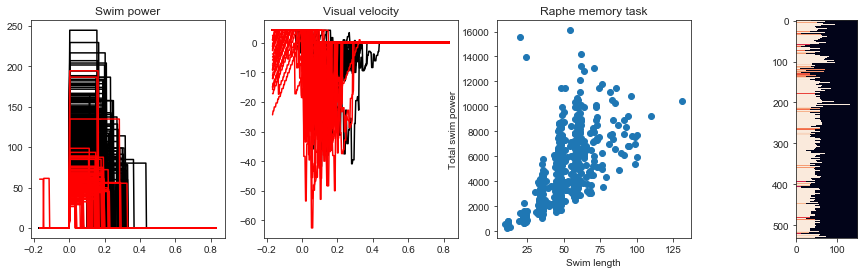

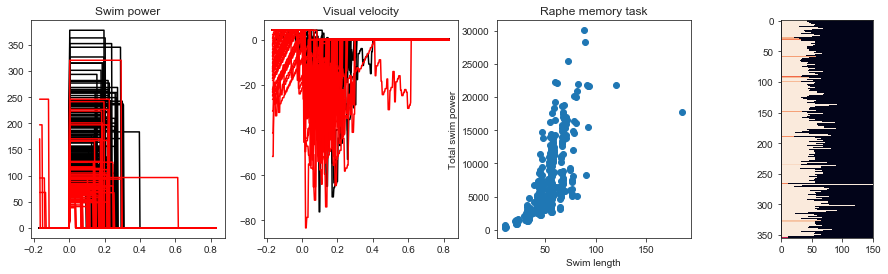

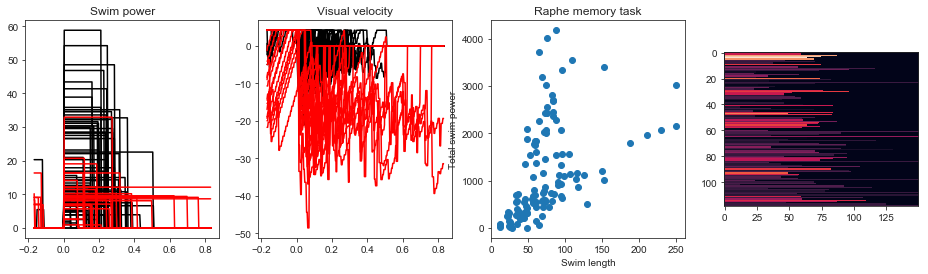

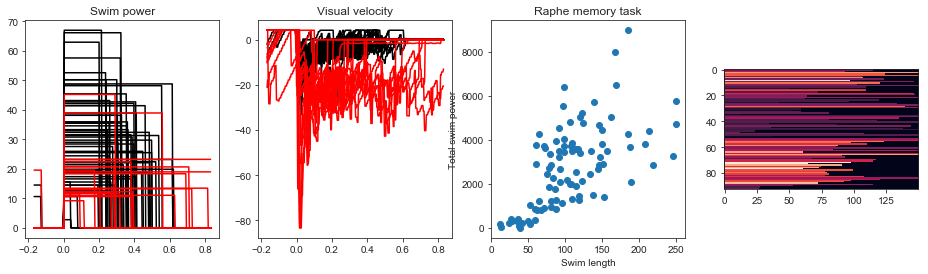

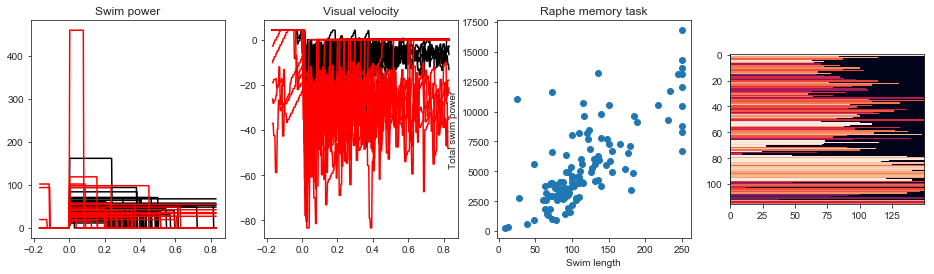

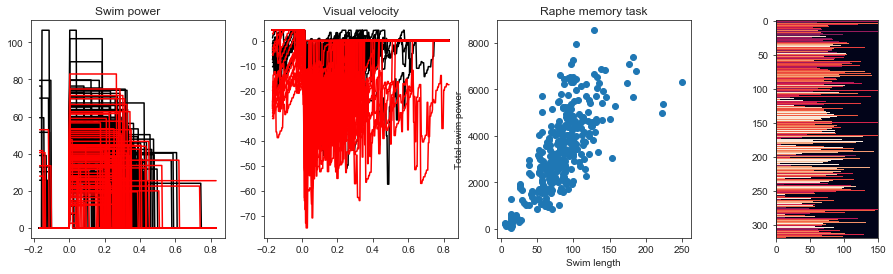

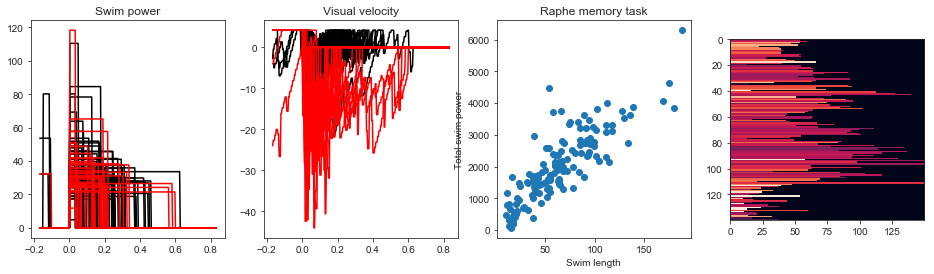

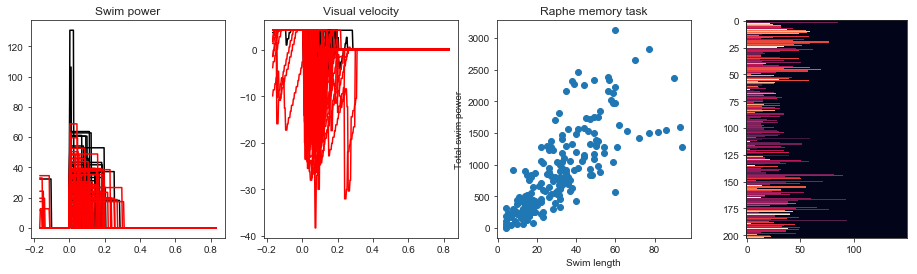

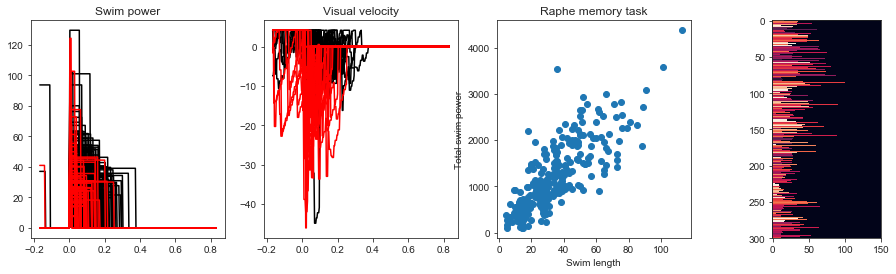

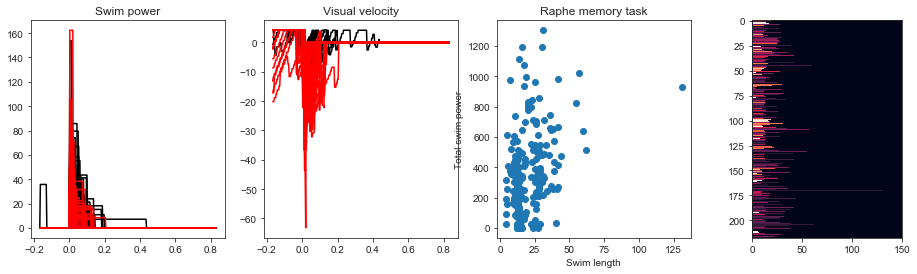

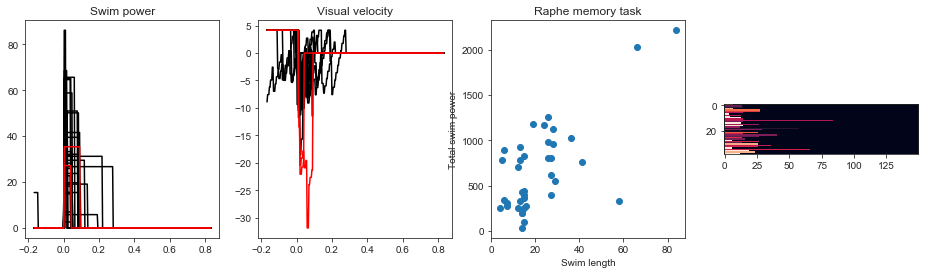

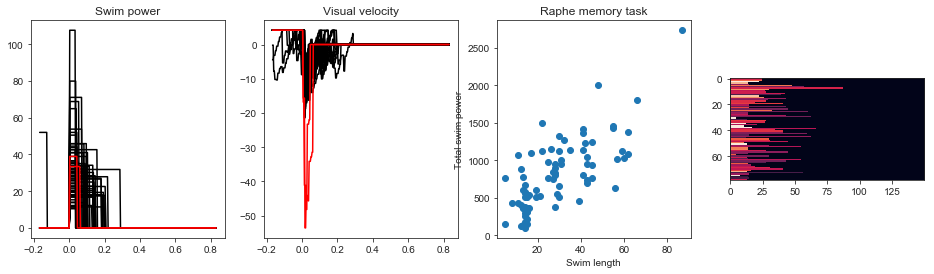

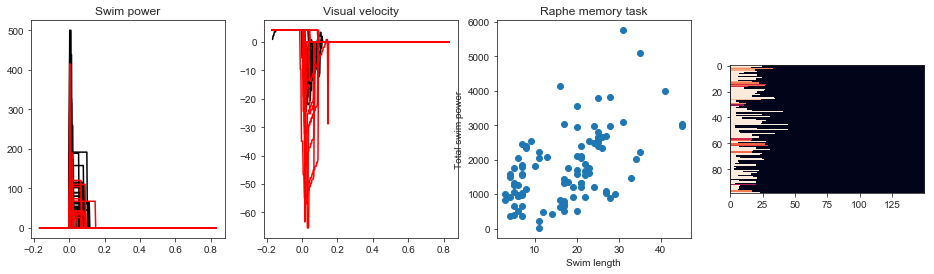

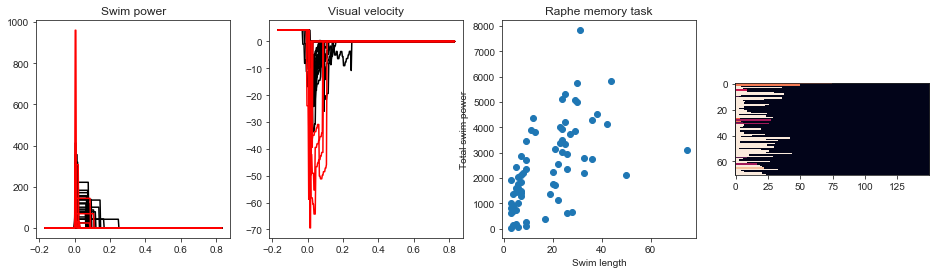

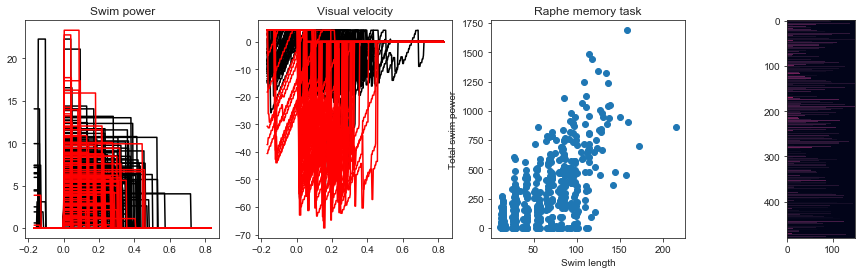

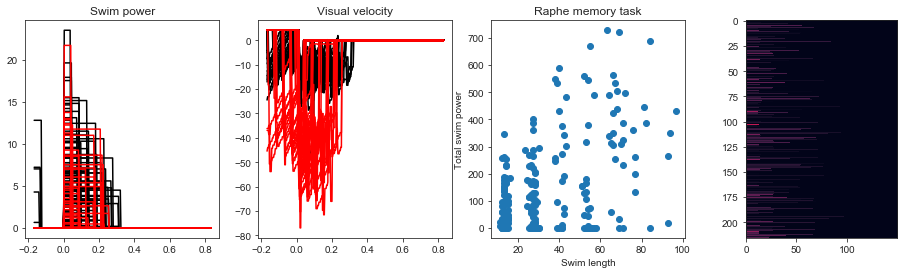

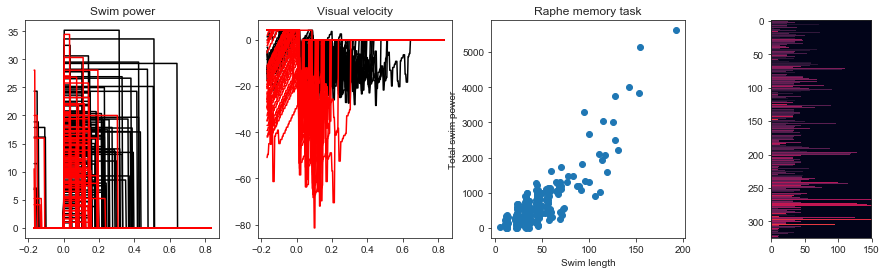

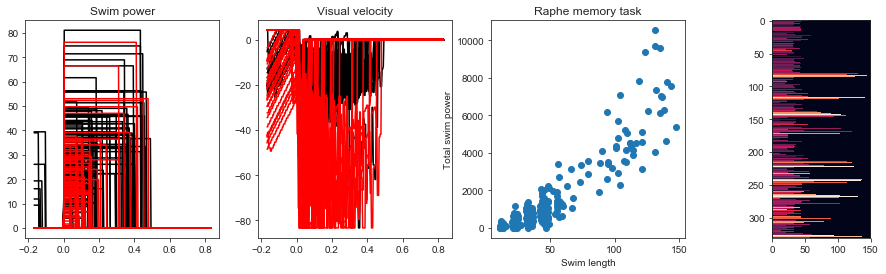

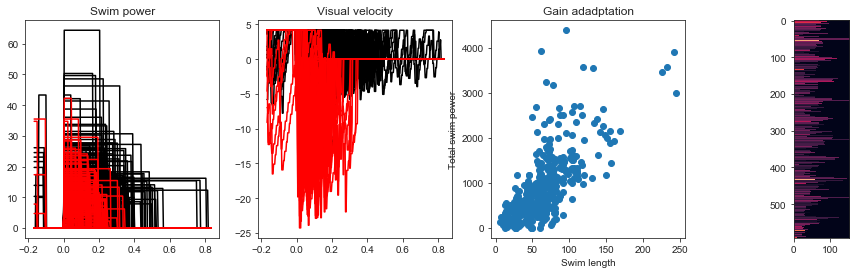

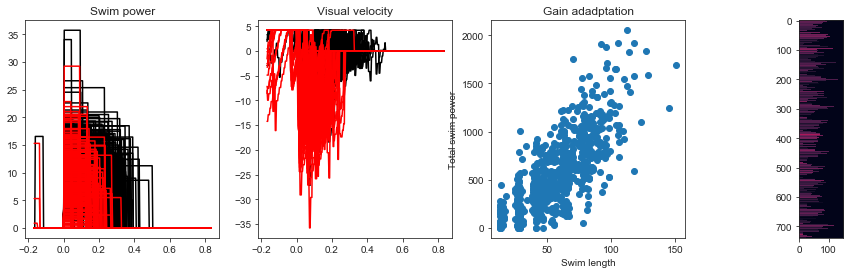

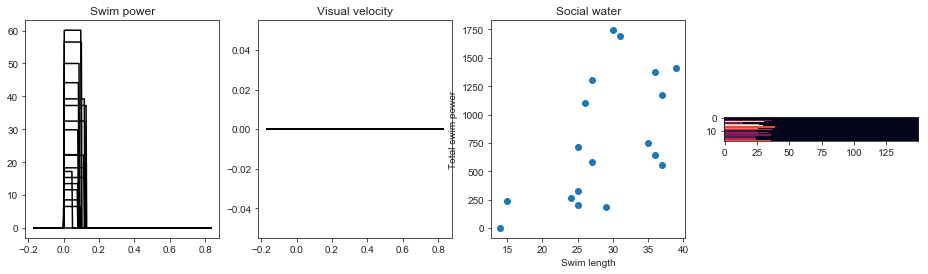

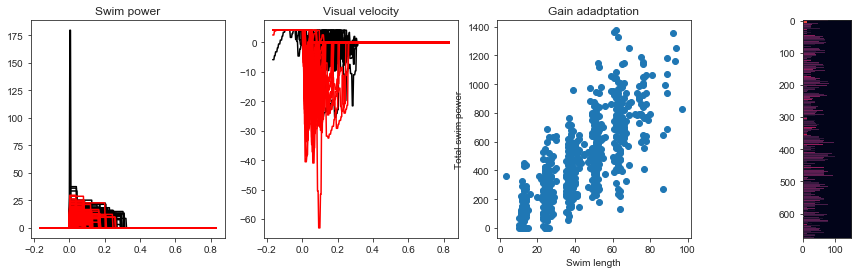

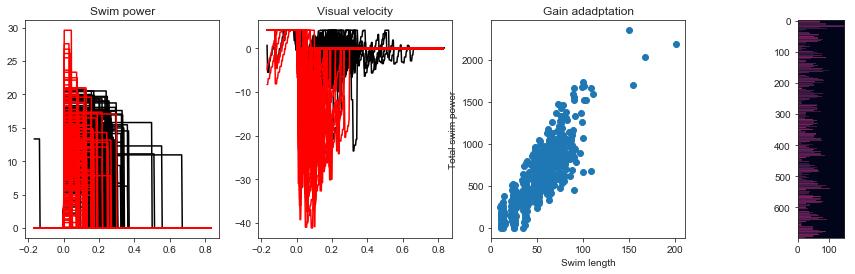

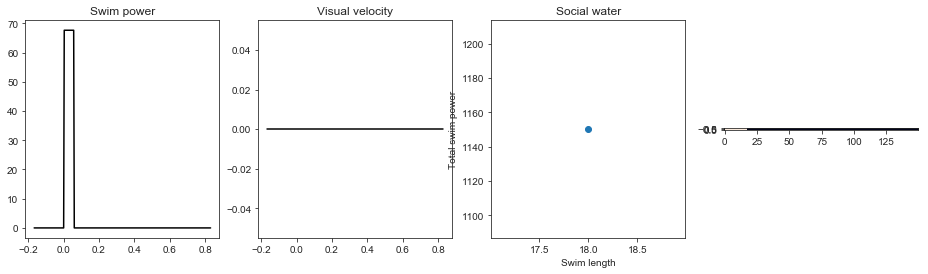

In [24]:
plt.close('all')
for index, row in dat_xls_file.iterrows():
    plot_swim(row)

In [86]:
p, res, _, _, _ = np.polyfit(ave_swim_len, tot_swim_power, 1, full=True)

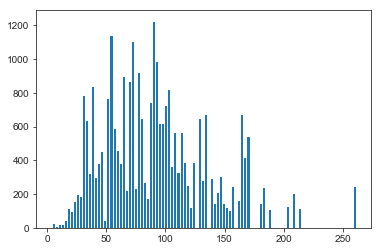

In [61]:
plt.hist(ave_swim[ave_swim>0].ravel(), bins=100)
plt.show()

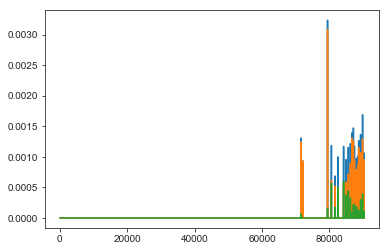

In [26]:
plt.plot(frame_swim_tcourse.T)

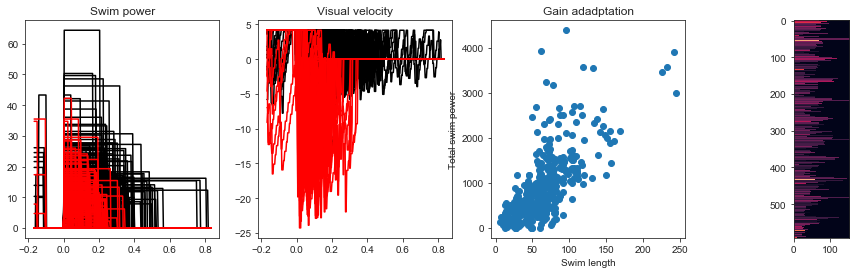

In [28]:
row = dat_xls_file.iloc[56]
folder = row['folder']
fish = row['fish']
dat_dir = dir_folder/f'{folder}/{fish}/Data/'
swim_dir = dir_folder/f'{folder}/{fish}/swim/'
frame_stimParams = np.load(swim_dir/'frame_stimParams.npy')
frame_swim_tcourse = np.load(swim_dir/'frame_swim_tcourse.npy')
swim_starts = np.where(np.diff((frame_swim_tcourse[0,:]>0).astype('int'))==1)[0]
swim_ends   = np.where(np.diff((frame_swim_tcourse[0,:]>0).astype('int'))==-1)[0]
swim_ends   = swim_ends[((swim_starts>50) & (swim_starts<(frame_swim_tcourse.shape[1]-250)))]
swim_starts = swim_starts[((swim_starts>50) & (swim_starts<(frame_swim_tcourse.shape[1]-250)))]
task_period = frame_stimParams[2,swim_starts]
task_index   = frame_stimParams[2,:]+(frame_stimParams[3,:]-1)*4+(frame_stimParams[4,:]-1)*12;
swim_task_index =  task_index[swim_starts]
swim_count  = np.zeros((len(swim_starts),))

ind_old=0
for s in range(len(swim_starts)):
    ind=swim_task_index[s]
    if (ind>ind_old):
        swim_count[s]=1
        ind_old=ind
    elif (ind==ind_old):
        swim_count[s]=swim_count[s-1]+1

## mean swim ptterns

ave_swim=np.zeros((len(swim_starts),300))
ave_visu=np.zeros((len(swim_starts),300))
ave_swim_len = np.zeros(len(swim_starts))

for i in range(len(swim_starts)):
    swim_len = swim_ends[i] - swim_starts[i]
    if swim_len>250:
        swim_len = 250
    ave_swim_len[i] = swim_len
    ave_swim[i,:swim_len+50]=frame_swim_tcourse[2,(swim_starts[i]-50):(swim_starts[i]+swim_len)]*100000
    ave_visu[i,:swim_len+50]=-frame_stimParams[0,(swim_starts[i]-50):(swim_starts[i]+swim_len)]*10000

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].plot(np.arange(-50,250)/300,ave_swim[task_period==1,:].T, '-k')
if (task_period==2).sum()>0:
    ax[0].plot(np.arange(-50,250)/300,ave_swim[task_period==2,:].T, '-r')
ax[0].set_title('Swim power')
ax[1].plot(np.arange(-50,250)/300,ave_visu[task_period==1,:].T, '-k')
if (task_period==2).sum()>0:
    ax[1].plot(np.arange(-50,250)/300,ave_visu[task_period==2,:].T, '-r') 
ax[1].set_title('Visual velocity')
tot_swim_power = ave_swim[:,50:].sum(axis=1)
ax[2].plot(ave_swim_len, tot_swim_power, 'o')
ax[2].set_ylabel('Total swim power')
ax[2].set_xlabel('Swim length')
ax[2].set_title(row['task'])
ax[3].imshow(ave_swim[:,50:200], vmax=60)
plt.savefig(f'swim_power/{folder}_{fish}.png')

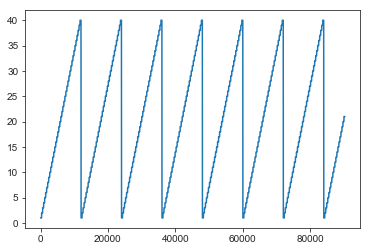

In [18]:
plt.plot(frame_swim_tcourse[4])

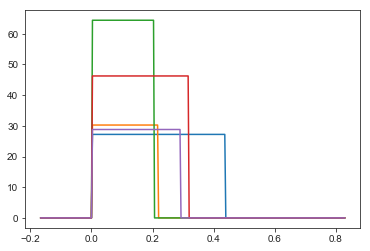

In [31]:
plt.plot(np.arange(-50,250)/300,ave_swim[:5,:].T)

In [7]:
frame_stimParams.shape

(5, 128541)

In [7]:
from sklearn.decomposition import NMF
num_comp = 40
swim_nmf = NMF(n_components=num_comp)
swim_nmf.fit(ave_swim[:,50:200])
swim_p_ = swim_nmf.fit_transform(ave_swim[:,50:200])
swim_new = swim_nmf.inverse_transform(swim_p_)

In [11]:
err = np.linalg.norm(swim_new-ave_swim[:,50:200], ord='fro')
var_ = np.linalg.norm(ave_swim[:,50:200] - ave_swim[:,50:200].mean(axis=0, keepdims=True), ord='fro')
print(f'explained variance: {1-err/var_}')

explained variance: 0.9170642403207313


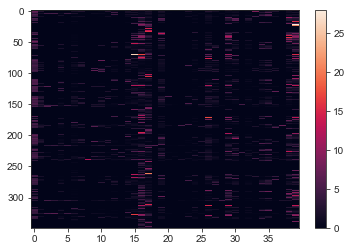

In [9]:
plt.imshow(swim_p_, aspect='auto')
plt.colorbar()
plt.show()

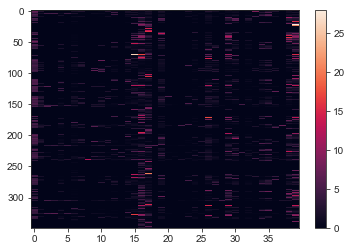

In [10]:
plt.imshow(swim_p_, aspect='auto')
plt.colorbar()

In [85]:
swim_nmf_proj = swim_nmf.components_

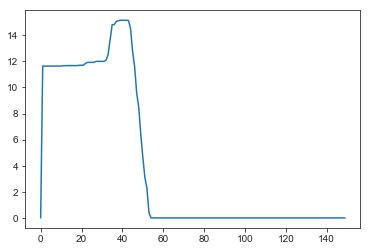

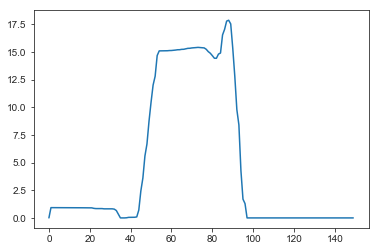

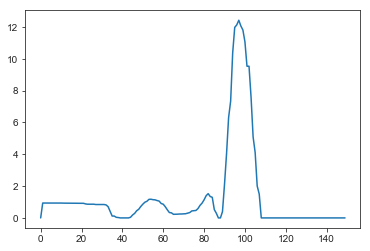

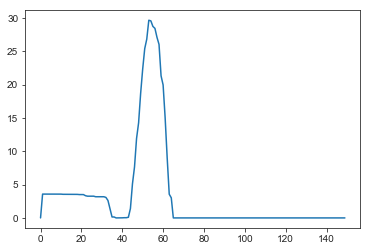

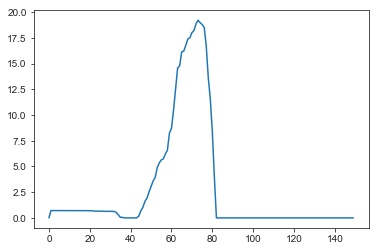

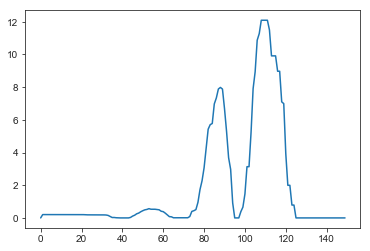

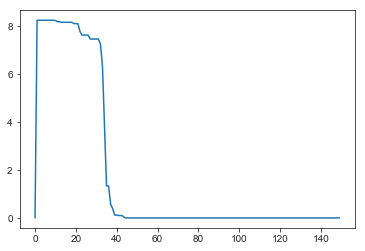

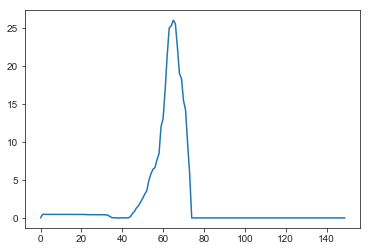

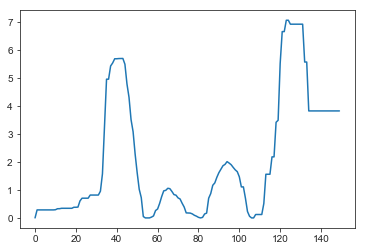

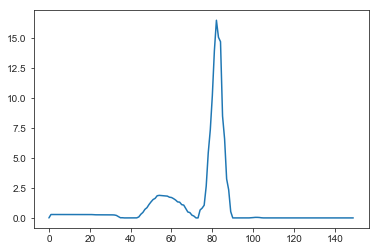

In [97]:
for n_c in range(num_comp):
    plt.plot(swim_nmf_proj[n_c, :].T)
    plt.show()

In [30]:
from sklearn import svm
clf = svm.SVC(gamma='auto', decision_function_shape='ovo')
clf.fit(swim_p_, task_period)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
false_ind = np.where(~np.equal(clf.predict(swim_p_), task_period))[0]

In [39]:
print(clf.predict(swim_p_)[false_ind])
print(task_period[false_ind])

[2. 2. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2.]
[3. 4. 1. 2. 2. 3. 2. 4. 4. 1. 4. 4. 3. 2. 4. 4. 4. 1. 4. 4.]


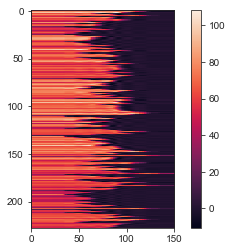

In [66]:
from scipy.stats import sem
ind = np.equal(clf.predict(swim_p_), task_period) & (task_period == 1)
mean_ = swim_new[ind, :].mean(axis=0)
sem_ = sem(swim_new[ind, :],axis=0)
plt.imshow(swim_new[ind, :],aspect=)
plt.colorbar()
plt.show()
# plt.plot(mean_)
# plt.plot(mean_+sem_)
# plt.plot(mean_-sem_)
# plt.show()

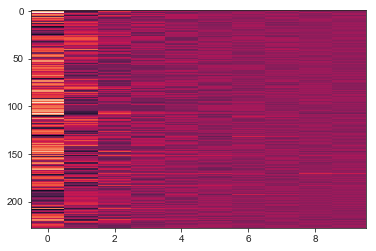

In [69]:
ind = np.equal(clf.predict(swim_p_), task_period) & (task_period == 1)
plt.imshow(swim_p_[ind, :], aspect='auto')

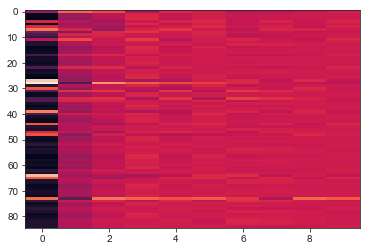

In [70]:
ind = np.equal(clf.predict(swim_p_), task_period) & (task_period == 2)
plt.imshow(swim_p_[ind, :], aspect='auto')

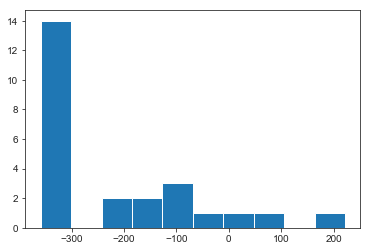

In [78]:
plt.hist(swim_p_[task_period == , 0])
plt.show()

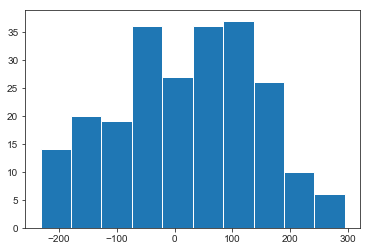

In [74]:
plt.hist(swim_p_[task_period == 1, 1])
plt.show()

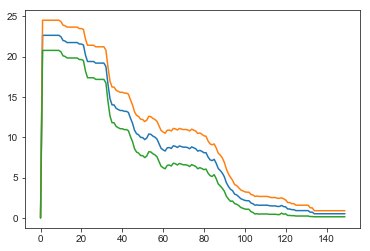

In [42]:
from scipy.stats import sem
ind = np.equal(clf.predict(swim_p_), task_period) & (task_period == 2)
mean_ = swim_new[ind, :].mean(axis=0)
sem_ = sem(swim_new[ind, :],axis=0)
plt.plot(mean_)
plt.plot(mean_+sem_)
plt.plot(mean_-sem_)
plt.show()

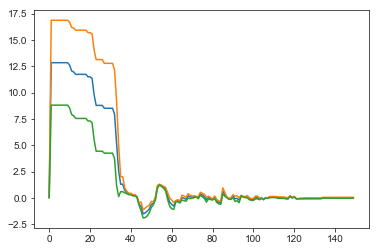

In [46]:
from scipy.stats import sem
ind = (~np.equal(clf.predict(swim_p_), task_period)) & (task_period == 1)
mean_ = swim_new[ind, :].mean(axis=0)
sem_ = sem(swim_new[ind, :],axis=0)
plt.plot(mean_)
plt.plot(mean_+sem_)
plt.plot(mean_-sem_)
plt.show()

In [ ]:
from sklearn.manifold import TSNE
swim_tsne = TSNE(n_components=2)
swim_tsne.fit(swim_new)
swim_t = swim_tsne.fit_transform(swim_new)

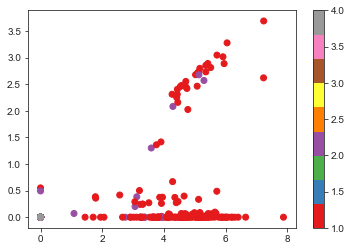

In [126]:
plt.scatter(swim_p_[:, 0], swim_p_[:, 7], c=task_period, cmap=plt.cm.Set1)
plt.colorbar()
plt.show()

/groups/ahrens/home/weiz/anaconda/envs/myenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


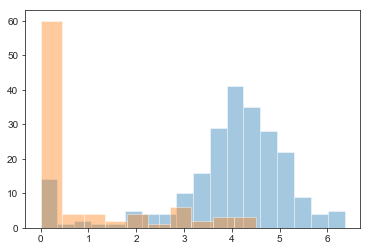

In [108]:
sns.distplot(swim_p_[task_period==1, 0], kde=False)
sns.distplot(swim_p_[task_period==2, 0], kde=False)